In [6]:
import boto3
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
heart = pd.read_csv(file_content_stream)
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
## Defining the input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

## splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Building the logistic model
logit_md = LogisticRegression().fit(X_train, Y_train)

## Predicting the likelyhood of TenYearCHD
preds = logit_md.predict_proba(X_test)[:,1]
preds

array([0.16505779, 0.21906252, 0.19522643, 0.06937418, 0.08996623,
       0.28347141, 0.07684956, 0.17408389, 0.12627127, 0.32092324,
       0.17846751, 0.32842084, 0.09814852, 0.08478736, 0.04759401,
       0.08785737, 0.04510396, 0.06270427, 0.09487188, 0.06912631,
       0.23364794, 0.04911475, 0.19710819, 0.14255938, 0.27653304,
       0.06333795, 0.07398079, 0.04084669, 0.36569005, 0.04237685,
       0.11533194, 0.04815777, 0.08126355, 0.24314909, 0.06372982,
       0.12044317, 0.05845446, 0.25888577, 0.11257677, 0.03696497,
       0.29993181, 0.03755743, 0.16248423, 0.0631433 , 0.04039655,
       0.17347414, 0.14694795, 0.202446  , 0.06523877, 0.34013206,
       0.12879232, 0.06784689, 0.09503139, 0.21219948, 0.23106729,
       0.30789669, 0.51040781, 0.27126497, 0.20844564, 0.06452764,
       0.31760884, 0.21612888, 0.13153565, 0.10044602, 0.40050325,
       0.14615952, 0.18215993, 0.21057559, 0.04835994, 0.17408044,
       0.09259217, 0.17183948, 0.21207053, 0.17079258, 0.14211

In [11]:
False_Positive_Rate, True_Positive_Rate, cutoffs = roc_curve(Y_test, preds)

In [12]:
ROC_results = pd.DataFrame({'FPR': False_Positive_Rate, 'TPR':True_Positive_Rate, 'cutoffs':cutoffs})
ROC_results.head()

,FPR,TPR,cutoffs
0,0.000000,0.000000,1.553584
1,0.001629,0.000000,0.553584
2,0.001629,0.008475,0.510408
3,0.003257,0.008475,0.476946
4,0.003257,0.016949,0.475874


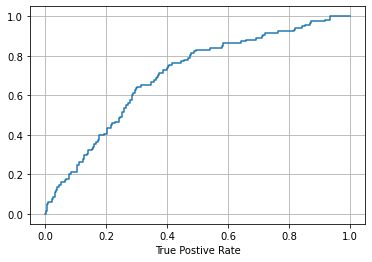

In [16]:
import matplotlib.pyplot as plt

plt.plot(ROC_results['FPR'], ROC_results['TPR'])
plt.xlabel('False Postive Rate')
plt.xlabel('True Postive Rate')
plt.grid()
plt.show()

In [14]:
ROC_results.describe()

,FPR,TPR,cutoffs
count,186.000000,186.000000,186.000000
mean,0.334069,0.535539,0.200536
std,0.264561,0.295989,0.141403
min,0.000000,0.000000,0.028511
25%,0.129072,0.296610,0.123106
50%,0.274430,0.559322,0.178722
75%,0.472313,0.788136,0.244764
max,1.000000,1.000000,1.553584
